<a href="https://colab.research.google.com/github/Gr-30/DL/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries/Dataset

## Import the required libraries and the dataset.

In [17]:
import pandas as pd
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = pd.read_csv("/content/drive/MyDrive/Assignment1/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", engine="python")

## Check the GPU available 


In [9]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-a5bcfe09-ace8-6ca7-e2fe-d1f4b64e9966)


# Data Visualization and augmentation

## Plot at least two samples from each class of the dataset

loading the data

In [10]:
data.columns = ["label", "time", "date", "query", "username", "text"]

Five top records

In [13]:
data.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Features of Data

In [11]:
data.columns

Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')

Data length

In [ ]:
len(data)

Data Information

In [ ]:
data.info()

Checking Null values

In [12]:
np.sum(data.isnull().any(axis=1))

0

In [30]:
stopwords_ = set(STOPWORDS)
positive_data = data['label'] = 1
def show_wordcloud(positive_data, title = None):
    wordcloud = WordCloud(
        collocations=False,
        background_color='white',
        stopwords=stopwords_,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

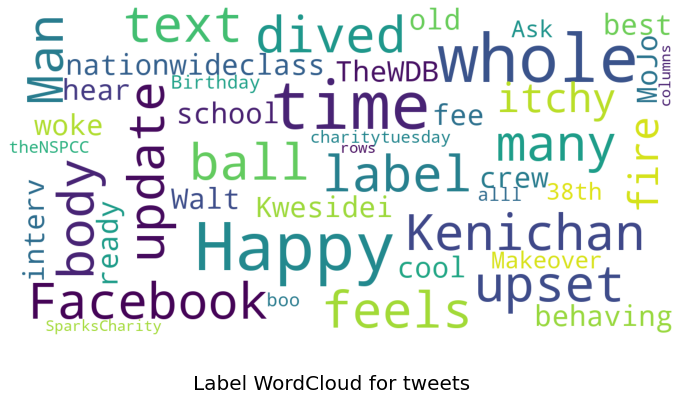

In [31]:
show_wordcloud(data['text'], "Label WordCloud for tweets")

In [26]:
stopwords_ = set(STOPWORDS)
positive_data = data['label'] = 0
def show_wordcloud(ngative_data, title = None):
    wordcloud = WordCloud(
        collocations=False,
        background_color='white',
        stopwords=stopwords_,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
show_wordcloud(data['text'], "Label- 0 WordCloud for tweets")